In [75]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [55]:
pwd()

'C:\\Users\\Koushik'

In [56]:
dataset = pd.read_excel("Folds5x2_pp.xlsx") #load dataset
dataset.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

In [57]:
dataset.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [58]:
dataset.PE.describe()

count    9568.000000
mean      454.365009
std        17.066995
min       420.260000
25%       439.750000
50%       451.550000
75%       468.430000
max       495.760000
Name: PE, dtype: float64

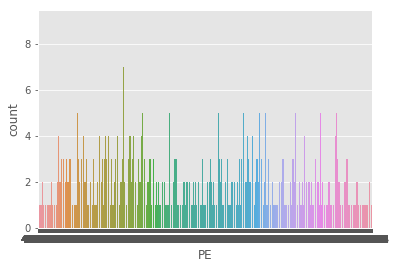

In [59]:
sns.countplot(dataset['PE'],label="Count")

In [60]:
dataset.isnull().head()

,AT,V,AP,RH,PE
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


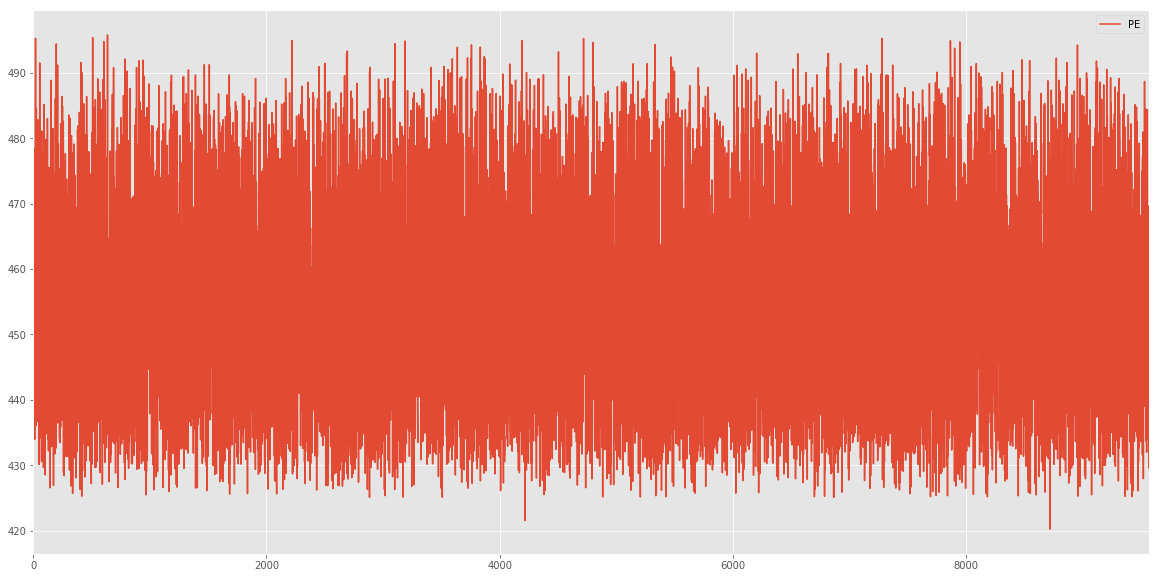

In [61]:
dataset.plot(y="PE",figsize=(20,10))

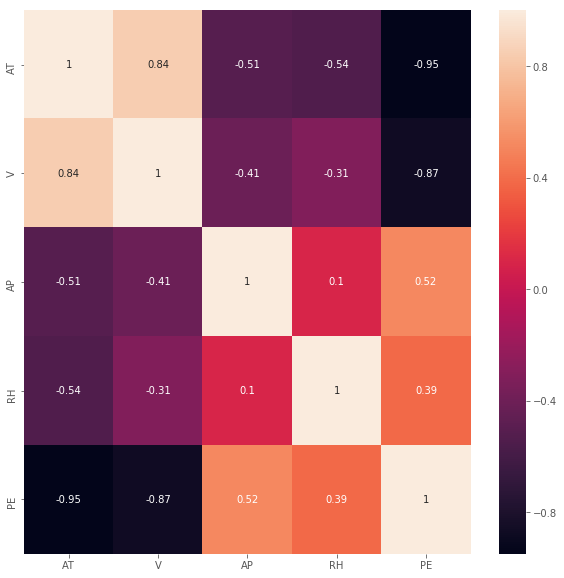

In [62]:
plt.figure(figsize  =(10,10))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

# Split using random splitting methods

In [63]:
msk = np.random.rand(len(dataset)) <= 0.7

train = dataset[msk]
test = dataset[~msk]

In [73]:
X_train = train[['AT','V','AP','RH']]
X_test = test[['AT','V','AP','RH']]

In [74]:
Y_train = train['PE']
Y_test = test['PE']

In [77]:
LR = LinearRegression()
LR.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [78]:
Y_prediction = LR.predict(X_test)

In [80]:
LR.score(X_test,Y_test)

0.9261847816868469

In [85]:
dataset = pd.DataFrame({'Actual Result': Y_test, 'Predicted Result': Y_prediction})
dataset.head(10)

,Actual Result,Predicted Result
0,463.26,467.038965
5,443.67,442.237677
7,478.42,478.298473
8,475.98,472.076995
14,433.99,435.384086
20,468.27,461.778372
22,483.80,479.109207
26,464.16,467.883691
27,475.52,479.100978
32,440.98,433.783001
